Вам нужно использовать Python 3.10 чтобы успешно запустить этот ноутбук

In [2]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas_profiling import ProfileReport

# Этап 1.1: Загрузка данных
# Загрузка данных из файла Housing.csv
file_path = 'Housing.csv'
df = pd.read_csv(file_path)

# Проверяем первые несколько строк данных, чтобы убедиться, что загрузка прошла успешно
print("Первые 5 строк датасета:")
display(df.head())

# Этап 1.2: Изучение структуры данных
# Основная информация о датасете
print("\nИнформация о датасете:")
print(df.info())

# Размеры датасета
print("\nРазмеры датасета (строки, столбцы):")
print(df.shape)

# Этап 1.3: Проверка пропусков и дубликатов
# Количество пропущенных значений
print("\nКоличество пропусков по каждому столбцу:")
print(df.isnull().sum())

# Проверяем наличие дубликатов
print("\nКоличество дубликатов:")
print(df.duplicated().sum())

# Этап 1.4: Обработка пропусков
# Заменим пропуски в числовых данных на среднее, если пропуски присутствуют
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

# Если пропуски есть в категориальных переменных, заменим их на "Unknown"
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna("Unknown", inplace=True)

# Повторно проверим пропуски после обработки
print("\nКоличество пропусков после обработки:")
print(df.isnull().sum())

# Удаляем дубликаты, если они есть
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
    print("\nДубликаты удалены.")

# Превращаем категории в 1,0
for col in ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]:
    df[col] = df[col].apply(lambda data: 1 if data=="yes" else 0)

# Сохраняем обработанный датасет
processed_file_path = 'Processed_Housing.csv'
df.to_csv(processed_file_path, index=False)
print(f"\nОбработанный датасет сохранён в файл: {processed_file_path}")

display(df.head())


Первые 5 строк датасета:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

Размеры датасета (строки, столбцы):
(545, 13)

Количество пропусков по каждому столбцу:
price               0
area          

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished



Описательная статистика числовых признаков:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


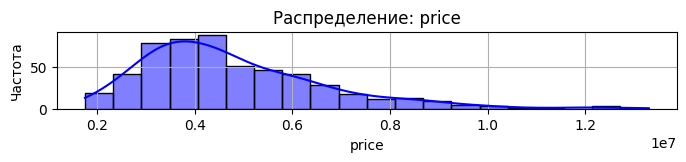

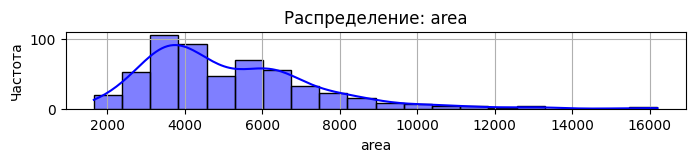

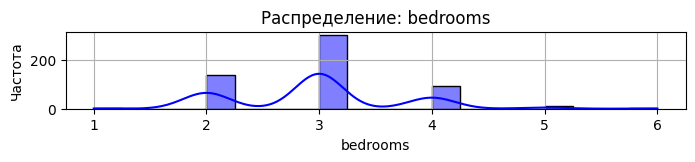

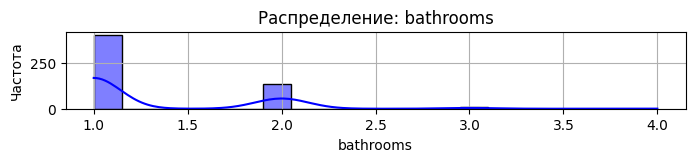

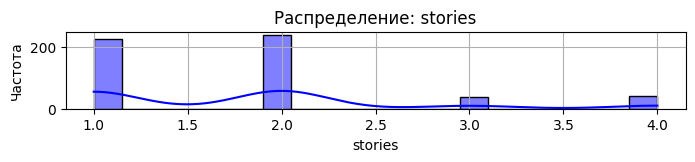

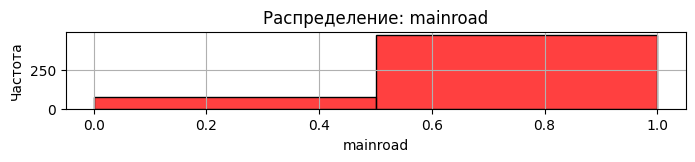

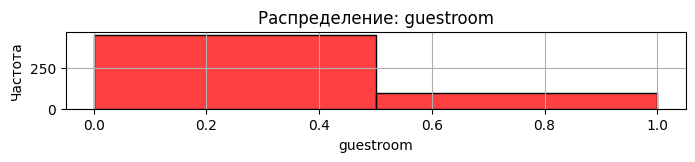

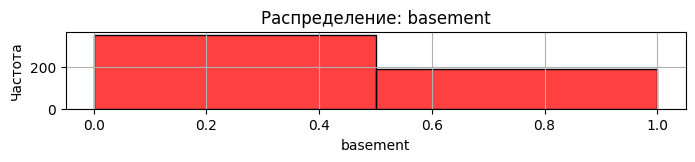

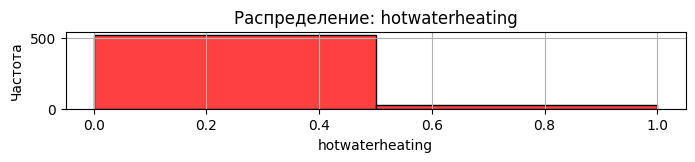

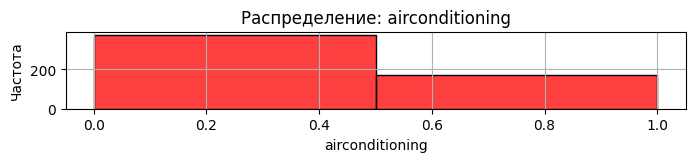

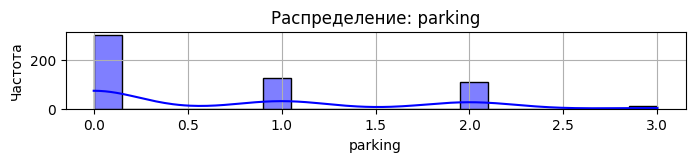

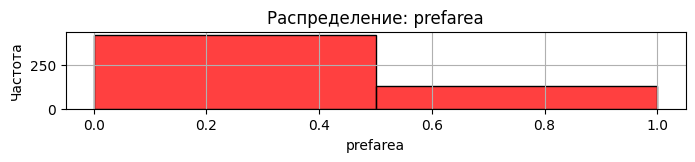


Анализ выбросов для price:
Нижняя граница: -35000.0, Верхняя граница: 9205000.0
Количество выбросов: 15


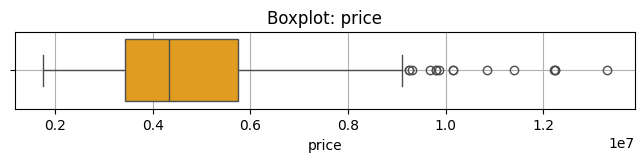


Анализ выбросов для area:
Нижняя граница: -540.0, Верхняя граница: 10500.0
Количество выбросов: 12


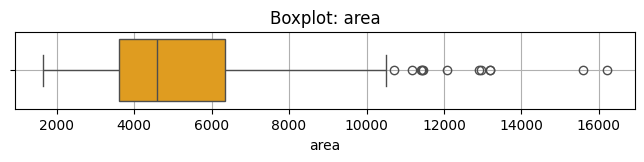


Анализ выбросов для bedrooms:
Нижняя граница: 0.5, Верхняя граница: 4.5
Количество выбросов: 12


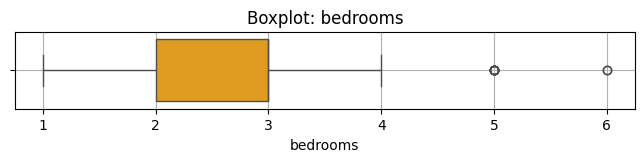


Анализ выбросов для bathrooms:
Нижняя граница: -0.5, Верхняя граница: 3.5
Количество выбросов: 1


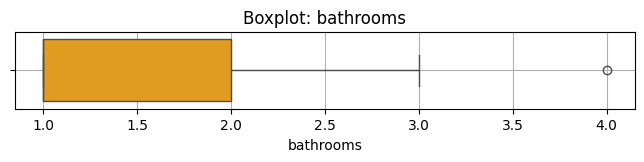


Анализ выбросов для stories:
Нижняя граница: -0.5, Верхняя граница: 3.5
Количество выбросов: 41


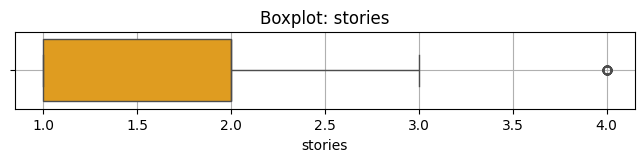


Анализ выбросов для mainroad:
Нижняя граница: 1.0, Верхняя граница: 1.0
Количество выбросов: 77


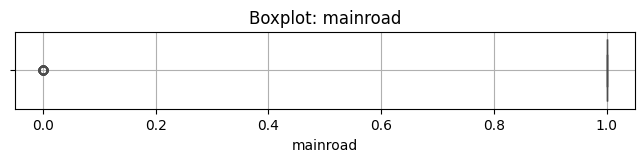


Анализ выбросов для guestroom:
Нижняя граница: 0.0, Верхняя граница: 0.0
Количество выбросов: 97


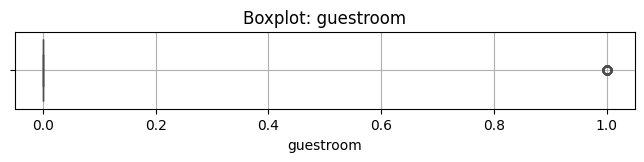


Анализ выбросов для basement:
Нижняя граница: -1.5, Верхняя граница: 2.5
Количество выбросов: 0


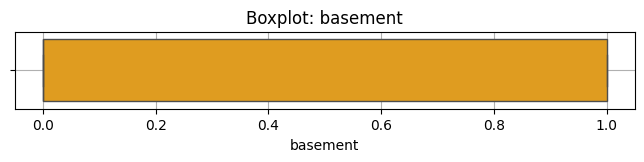


Анализ выбросов для hotwaterheating:
Нижняя граница: 0.0, Верхняя граница: 0.0
Количество выбросов: 25


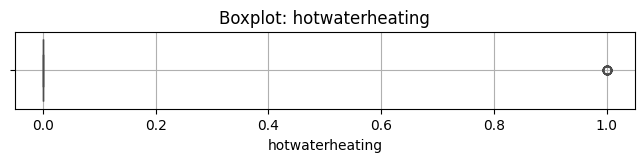


Анализ выбросов для airconditioning:
Нижняя граница: -1.5, Верхняя граница: 2.5
Количество выбросов: 0


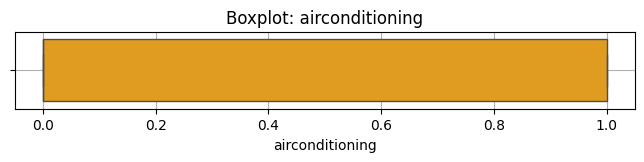


Анализ выбросов для parking:
Нижняя граница: -1.5, Верхняя граница: 2.5
Количество выбросов: 12


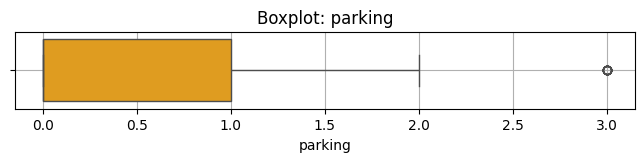


Анализ выбросов для prefarea:
Нижняя граница: 0.0, Верхняя граница: 0.0
Количество выбросов: 128


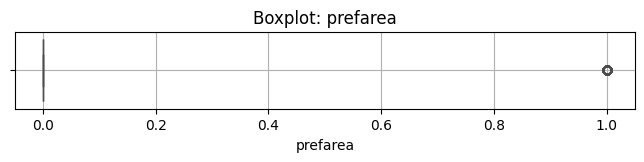


Анализ асимметрии и эксцесса:
price: асимметрия = 1.21, эксцесс = 1.96
area: асимметрия = 1.32, эксцесс = 2.75
bedrooms: асимметрия = 0.50, эксцесс = 0.73
bathrooms: асимметрия = 1.59, эксцесс = 2.16
stories: асимметрия = 1.08, эксцесс = 0.68
mainroad: асимметрия = -2.07, эксцесс = 2.27
guestroom: асимметрия = 1.69, эксцесс = 0.85
basement: асимметрия = 0.63, эксцесс = -1.61
hotwaterheating: асимметрия = 4.35, эксцесс = 17.01
airconditioning: асимметрия = 0.80, эксцесс = -1.37
parking: асимметрия = 0.84, эксцесс = -0.57
prefarea: асимметрия = 1.25, эксцесс = -0.43


In [3]:
# Этап 2.1: Анализ описательной статистики
print("\nОписательная статистика числовых признаков:")
display(df.describe())

# Этап 2.2: Проверка распределений
# Построение гистограмм для всех числовых переменных
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 1))
    if df[col].unique().shape[0] > 2:
        sns.histplot(df[col], kde=True, bins=20, color='blue')
    else:
        sns.histplot(df[col], bins=2, color='red')
    plt.title(f"Распределение: {col}")
    plt.xlabel(col)
    plt.ylabel("Частота")
    plt.grid(True)
    plt.show()

# Этап 2.3: Выявление выбросов
# Рассчитаем межквартильный размах (IQR) для каждого числового признака
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"\nАнализ выбросов для {col}:")
    print(f"Нижняя граница: {lower_bound}, Верхняя граница: {upper_bound}")
    print(f"Количество выбросов: {outliers.shape[0]}")

    # Визуализация выбросов через boxplot
    plt.figure(figsize=(8, 1))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f"Boxplot: {col}")
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

# Этап 2.4: Анализ асимметрии и эксцесса
print("\nАнализ асимметрии и эксцесса:")
for col in numerical_columns:
    skewness = df[col].skew()
    kurtosis = df[col].kurt()
    print(f"{col}: асимметрия = {skewness:.2f}, эксцесс = {kurtosis:.2f}")


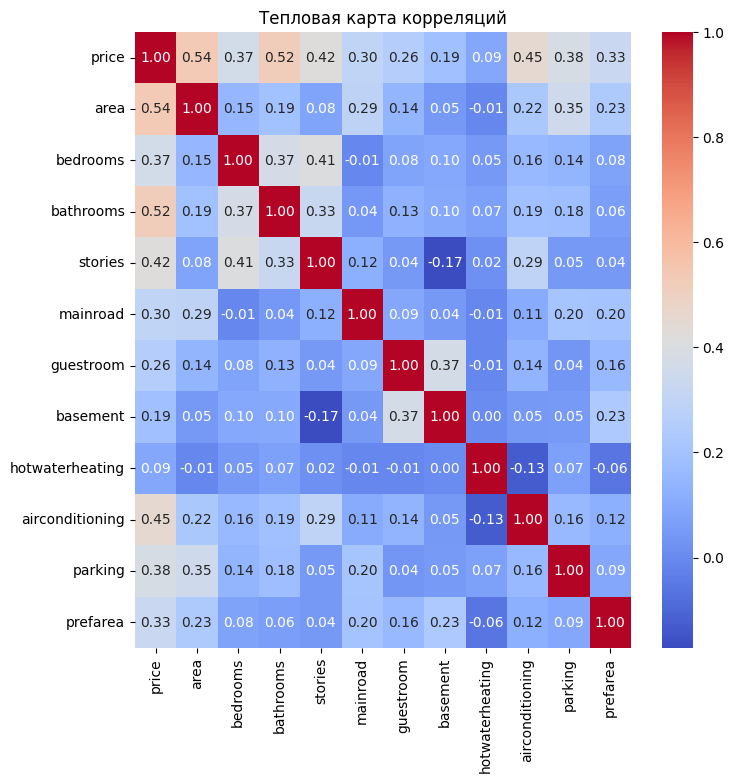


Признаки с высокой корреляцией с ценой:
price        1.000000
area         0.535997
bathrooms    0.517545
Name: price, dtype: float64


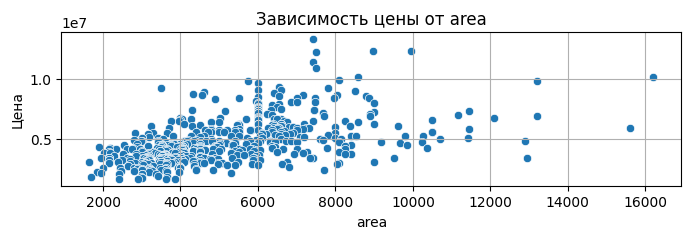

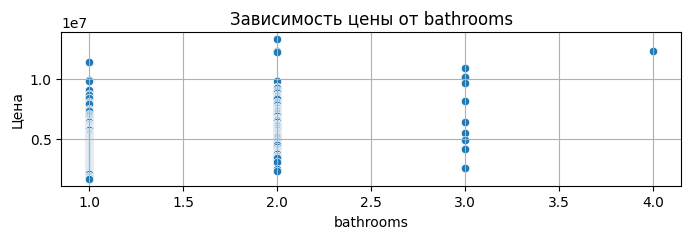

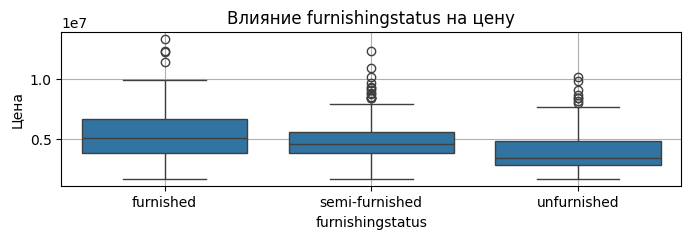

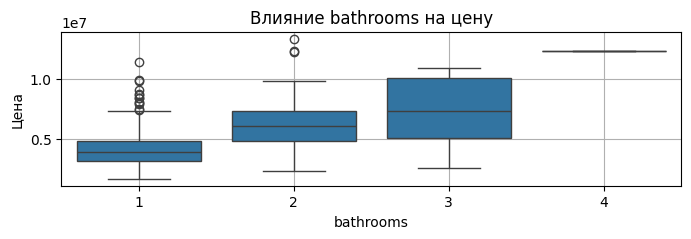

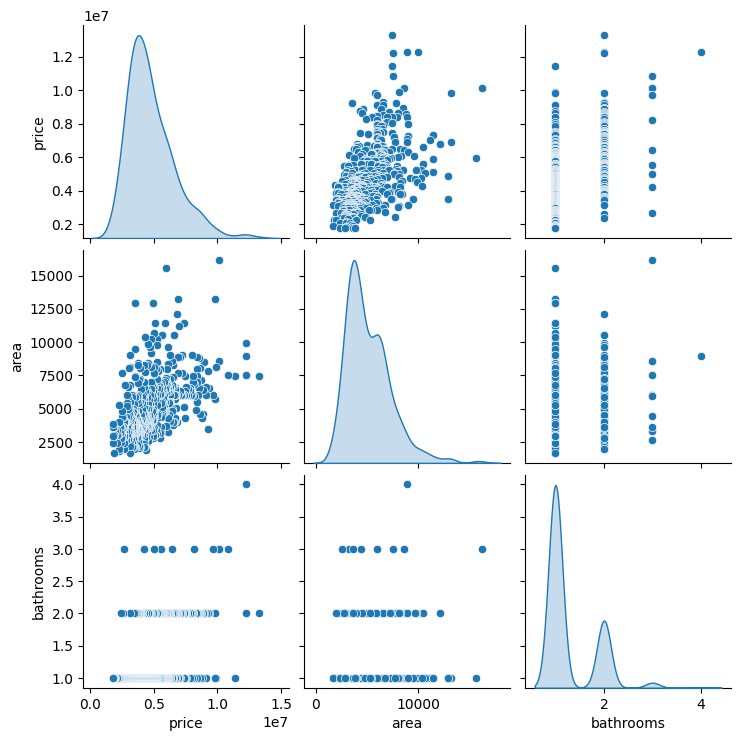

In [4]:
# Этап 3.1: Корреляционный анализ
# Рассчитаем корреляционную матрицу для числовых переменных
correlation_matrix = df[df.columns[:-1]].corr()

# Визуализация корреляционной матрицы через тепловую карту
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Тепловая карта корреляций")
plt.show()

# Определяем признаки с высокой корреляцией (больше 0.7 или меньше -0.7)
high_corr = correlation_matrix['price'][(correlation_matrix['price'] > 0.5) | (correlation_matrix['price'] < -0.7)]
print("\nПризнаки с высокой корреляцией с ценой:")
print(high_corr)

# Этап 3.2: Графический анализ зависимостей
# Построим scatter-плоты для признаков с высокой корреляцией с ценой
for col in high_corr.index:
    if col != 'price':  # Исключаем цену (целевая переменная)
        plt.figure(figsize=(8, 2))
        sns.scatterplot(x=df[col], y=df['price'])
        plt.title(f"Зависимость цены от {col}")
        plt.xlabel(col)
        plt.ylabel("Цена")
        plt.grid(True)
        plt.show()

# Этап 3.3: Анализ категориальных переменных
# Выберем категориальные переменные для анализа
categorical_columns = list(df.select_dtypes(include=['object']).columns)
categorical_columns.append("bathrooms")

# Boxplots для категориальных переменных
for col in categorical_columns:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[col], y=df['price'])
    plt.title(f"Влияние {col} на цену")
    plt.xlabel(col)
    plt.ylabel("Цена")
    plt.grid(True)
    plt.show()

# Этап 3.4: Парные графики
# Построим pairplot для ключевых числовых признаков
# Выбираем целевую переменную и наиболее коррелирующие признаки
key_features = ['price'] + list(high_corr.index[1:])  # Исключаем саму цену из набора коррелирующих признаков
sns.pairplot(df[key_features], diag_kind="kde")
plt.show()


In [5]:
# Этап 4.1: Установка pandas-profiling (если необходимо)
# Этап 4.2: Создание автоматического отчёта

# Генерация отчёта по датасету
print("\nГенерация отчёта с использованием pandas-profiling...")
profile = ProfileReport(df, title="Housing Dataset Report", explorative=True)

# Сохраняем отчёт в файл HTML
report_file_path = 'Housing_Report.html'
profile.to_file(report_file_path)
print(f"\nОтчёт сохранён в файл: {report_file_path}")

# Этап 4.3: Сравнение ручного анализа с автоматическим
print("\nПроверьте автоматический отчёт и сопоставьте его выводы с результатами ручного анализа.")



Генерация отчёта с использованием pandas-profiling...


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 333.52it/s]


Отчёт сохранён в файл: Housing_Report.html

Проверьте автоматический отчёт и сопоставьте его выводы с результатами ручного анализа.
